## Part 1: Import Statements

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from collections import Counter


from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Part 2: Import processed data

In [24]:
data = pd.read_csv("Data/processed_data.csv", index_col=0)
data = data.dropna()
data

,tweet,class
0,woman shouldnt complain cleaning house man alw...,2
1,boy dats coldtyga dwn bad cuffin dat hoe place,1
2,dawg ever fuck bitch stato cry confused shit,1
3,look like tranny,1
4,shit hear might true might faker bitch told ya,1
...,...,...
25291,yous muthafin lie right tl trash mine bible sc...,1
25292,youve gone broke wrong heababy drove redneck c...,2
25294,young buck wan na eat dat nigguh like aint fuc...,1
25295,youu got wild bitches tellin lies,1


## Part 3: Splitting data 

Splitting data 

In [25]:

#splitting the data into train, validation, test
X, X_test, y, y_test = train_test_split(data['tweet'], data['class'],  test_size=0.2,random_state=42)


In [26]:
#splitting the data into train and validation
X_train, X_cv, y_train, y_cv = train_test_split(X,y,test_size = 0.25,train_size =0.75, stratify=y,random_state=42)
X_train.shape

(14319,)

In [27]:
X_train.sample(5)

5861                         monkey poor bottles
4242                                  slap bitch
21910    thats know pussy ready white people gay
4185                             means trash lol
23720           aint trynna fuc get ya shoes hoe
Name: tweet, dtype: object

## Part 4: Feature Extraction

## Count Vectorization

Word n grams: unigrams

In [28]:
#Count Vectorizing the X_train
count_vec = CountVectorizer()
count_vec.fit(X_train)

X_train_count = count_vec.transform(X_train)
X_train_count = X_train_count.toarray()

#Count Vectorizing the X_cv
X_cv_count = count_vec.transform(X_cv)
X_cv_count = X_cv_count.toarray()

#Count Vectorizing the X_test
X_test_count = count_vec.transform(X_test)
X_test_count = X_test_count.toarray()

count_vec.vocabulary_

{'punch': 10919,
 'bitch': 1303,
 'lip': 8055,
 'hahaha': 5952,
 'go': 5618,
 'buy': 1950,
 'bitches': 1312,
 'waka': 15168,
 'tammy': 13777,
 'got': 5715,
 'ass': 646,
 'beat': 1066,
 'ctfu': 3183,
 'niggas': 9413,
 'dont': 3888,
 'ever': 4468,
 'back': 830,
 'face': 4595,
 'tears': 13876,
 'joy': 7370,
 'forgot': 5105,
 'youre': 15937,
 'bull': 1846,
 'said': 11857,
 'yeezus': 15860,
 'good': 5673,
 'jcole': 7225,
 'trash': 14429,
 'might': 8766,
 'one': 9762,
 'sneak': 12803,
 'dissin': 3783,
 'hoe': 6398,
 'nigga': 9404,
 'pussy': 10953,
 'nigguh': 9432,
 'name': 9208,
 'jesus': 7267,
 'daddy': 3284,
 'yellow': 15866,
 'outside': 9922,
 'like': 8004,
 'girls': 5567,
 'cant': 2062,
 'guys': 5919,
 'hit': 6368,
 'girl': 5561,
 'double': 3921,
 'standard': 13204,
 'forever': 5094,
 'exist': 4531,
 'kirk': 7593,
 'hinrich': 6349,
 'going': 5650,
 'fucking': 5274,
 'dumb': 4092,
 'adawg': 104,
 'getcho': 5499,
 'ghetto': 5518,
 'booty': 1550,
 'ta': 13717,
 'bad': 849,
 'always': 339,
 

Vocabulary of train and test set with respective counts

In [29]:
words = []
amounts = []
for key, value in count_vec.vocabulary_.items():
    words.append(key)
    amounts.append(value)

word_counts = pd.DataFrame(words, columns = ["words"])
word_counts["amounts"] = amounts

In [30]:
word_counts.sort_values(by = "amounts", ascending = False, inplace = True)

TFIDF Vectorization

In [31]:
#TFIDF Vectorizing the X_train

tfidf = TfidfVectorizer()

X_train_tf = tfidf.fit_transform(X_train)
X_train_tf = X_train_tf.toarray()

#Vectorizing the X_cv
X_cv_tf = tfidf.transform(X_cv)
X_cv_tf = X_cv_tf.toarray()

#TFIDF Vectorizing the X_test
X_test_tf = tfidf.transform(X_test)
X_test_tf = X_test_tf.toarray()


Balancing training data

In [32]:
def oversample(X_train_vectorized, y_train):
    print("Before Oversampling: {}".format(Counter(y_train)))

    # # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='all')

    # # fit and apply the transform
    X_train_over, y_train_over = oversample.fit_resample(X_train_vectorized, y_train)
    print("After Oversampling: {}".format(Counter(y_train_over)))
    
    return X_train_over, y_train_over

## Oversampling

Oversampling CountVectorized training data

In [33]:
X_train_over_count, y_train_over_count = oversample(X_train_count, y_train)

Before Oversampling: Counter({1: 11049, 2: 2453, 0: 817})
After Oversampling: Counter({1: 11049, 2: 11049, 0: 11049})


Oversampling TFIDF-Vectorized  training data

In [34]:
X_train_over_tf, y_train_over_tf = oversample(X_train_tf, y_train)

Before Oversampling: Counter({1: 11049, 2: 2453, 0: 817})
After Oversampling: Counter({1: 11049, 2: 11049, 0: 11049})


## Models

In [35]:
def printModelStats(y_preds, y_test):
    print(classification_report(y_test, y_preds, target_names = ['Hate', 'Offensive', 'Neither']))
    
    cm = confusion_matrix(y_test,y_preds)
    print("The confusion matrix:")
    print(cm)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    sns.heatmap((cm_percent), annot = True, cmap = "Blues").set(title ="Confusion Matrix Expressed in %")

## LinearSVC

## Count Vectorization

Linear SVC and data with CountVectorizations

In [36]:
# Initalising model
svc = LinearSVC(random_state= 424, max_iter = 20000)

# Train and predict
svc.fit(X_train_over_count, y_train_over_count)
y_preds = svc.predict(X_cv_count)


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

        Hate       0.27      0.42      0.33       272
   Offensive       0.93      0.89      0.91      3683
     Neither       0.80      0.80      0.80       818

    accuracy                           0.85      4773
   macro avg       0.67      0.70      0.68      4773
weighted avg       0.87      0.85      0.86      4773

The confusion matrix:
[[ 114  129   29]
 [ 278 3272  133]
 [  34  131  653]]


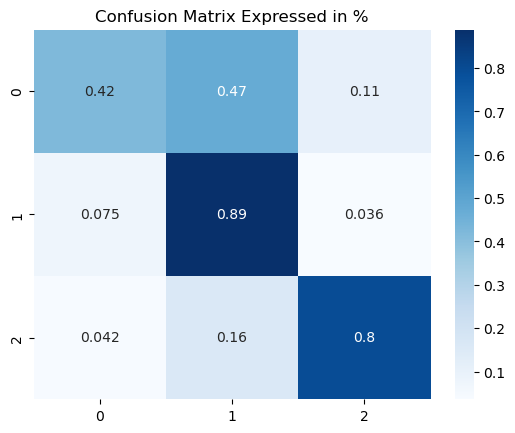

In [37]:
# output statistics
printModelStats(y_preds, y_cv)

Gridsearch for optimization

In [38]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'dual': ["auto"],
    # 'tol': [1e-4, 1e-5],
    'C': [1, 10],
    'multi_class': ['ovr', 'crammer_singer'],
    'fit_intercept': [True, False],
    'intercept_scaling': [1, 1.5 ,2],
    'class_weight': [None, 'balanced']
}

svc = LinearSVC(random_state= 424, max_iter = 20000)

grid_search_svc_count = GridSearchCV(svc, param_grid, refit=True,verbose = 3, cv = 5)


grid_search_svc_count.fit(X_train_over_count, y_train_over_count)
grid_search_svc_count.best_params_
    
# best_params_:{'C': 10, 'dual': 'auto', 'loss': 'squared_hinge', 'penalty': 'l1'}

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   9.4s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   2.7s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   2.4s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   2.6s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   2.6s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l2;, score=

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=   9.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   9.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   7.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   9.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=   8.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=  10.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   9.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   6.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   7.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=   7.6s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.955 total time=   6.4s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=   6.4s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   6.2s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=   5.8s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=   8.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   8.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   7.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   8.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=   7.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=   8.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   8.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   7.2s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   7.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=   7.6s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.8s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.8s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.8s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.8s
[CV 1/5] 

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=   7.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   9.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   9.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=  11.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=   8.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=   8.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   9.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   8.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=  11.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=   8.5s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=   6.4s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=   6.2s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   6.8s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=   6.2s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=   7.8s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   9.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   8.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=  11.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=   8.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=   9.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  10.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   9.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=  11.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=   8.1s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.8s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 1/5] END C=1,

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=   9.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  10.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   8.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   9.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=  10.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=  10.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  10.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   9.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   9.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=  10.2s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=   6.3s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=   6.3s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   6.3s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=   6.0s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  11.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   9.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=  10.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=  10.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=   9.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  10.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   8.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   8.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=  10.1s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   2.0s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   2.0s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.8s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.8s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 1/5] END C

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.952 total time=   6.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   5.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   6.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.952 total time=   6.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   6.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.5s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=   5.2s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=   5.6s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=   5.3s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   5.2s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, sc

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   5.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.952 total time=   6.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   4.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   6.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   5.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.952 total time=   6.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   4.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   6.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.5s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.8s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.9s
[CV

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.952 total time=   6.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   4.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   6.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.952 total time=   6.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   5.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   6.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   6.0s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=   5.5s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=   5.7s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=   5.3s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   5.2s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, pen

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   5.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.952 total time=   6.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   6.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.952 total time=   6.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   6.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.5s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 1/5] EN

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.952 total time=   6.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   6.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   5.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.952 total time=   6.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   6.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.5s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=   5.2s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=   5.5s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=   5.3s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   5.3s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, sc

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.952 total time=   6.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   4.9s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   6.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   5.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.952 total time=   6.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   6.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.4s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=   8.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   8.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   8.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=   5.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=   8.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   8.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   7.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   8.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=   6.1s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.955 total time=   5.9s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=   6.0s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   5.9s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=   6.2s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ov

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=   8.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   8.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   7.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   8.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=   6.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=   8.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   8.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   8.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=   6.0s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan tota

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=   7.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   8.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   7.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   7.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=   8.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=   7.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   8.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   8.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   7.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=   8.0s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=   6.1s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=   5.9s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   6.1s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=   6.0s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, mu

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=   7.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   8.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   7.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   7.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=   7.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=   7.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   8.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   7.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   7.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=   8.0s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.8s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time= 

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=   9.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   9.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   8.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=  12.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=   9.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=   9.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  10.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   8.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=  11.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=   9.8s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=   5.9s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=   6.1s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   6.1s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=   6.1s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ov

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=   9.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   9.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   9.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=  13.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=   9.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=   9.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   9.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   8.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=  12.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=   9.9s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total tim

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.952 total time=   6.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   5.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   7.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.952 total time=   6.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   4.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   6.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.6s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=   5.2s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=   5.6s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=   5.3s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   5.2s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_cl

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.952 total time=   6.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   4.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   6.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   5.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.952 total time=   6.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   4.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   6.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.7s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=na

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   5.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.952 total time=   6.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   4.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   6.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.952 total time=   6.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   4.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   6.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.5s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=   5.2s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=   5.7s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=   5.3s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   5.1s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hin

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.952 total time=   6.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   4.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   6.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.952 total time=   6.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   4.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   6.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   6.0s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total 

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   5.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.952 total time=   6.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   4.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   6.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.952 total time=   6.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   4.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   7.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.6s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=   5.2s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=   5.6s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=   5.3s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   5.1s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_cl

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   5.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.952 total time=   6.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   4.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   7.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   5.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.952 total time=   6.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   4.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   6.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.6s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 1/5] 

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  23.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=  12.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  10.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  17.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  21.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  23.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=  12.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  10.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  19.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  20.8s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=  27.7s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.952 total time=  24.6s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.962 total time=  22.2s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.960 total time=  24.1s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, sc

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  23.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=  12.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  10.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  17.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  20.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  25.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=  12.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  10.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  17.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  20.9s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.6s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  17.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=  14.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  14.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  32.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  23.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  18.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=  14.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  13.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  31.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  23.9s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=  28.0s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.952 total time=  23.2s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.962 total time=  23.3s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.960 total time=  24.5s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, pen

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  17.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=  14.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  13.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  32.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  22.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  18.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=  14.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  13.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  32.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  28.2s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 1/5] EN

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l2;, score=0.959 total time=  22.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  53.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=  15.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  15.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  26.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  32.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time= 1.1min


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=  15.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  19.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  25.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  33.0s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=  27.2s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=  23.9s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.962 total time=  22.6s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.960 total time=  25.2s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, sc

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  54.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=  15.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  14.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  26.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  32.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  54.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=  15.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  17.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  26.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  33.8s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.6s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 1/5]

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=  12.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=  15.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  10.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  18.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  17.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=  12.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=  15.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=   9.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  17.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  17.5s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=  21.5s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=  19.6s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=  18.0s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=  19.6s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=  12.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=  15.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=   9.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  17.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  17.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=  14.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=  16.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  10.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  18.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  17.3s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.6s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=  12.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=  17.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=   9.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  18.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  17.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=  12.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=  16.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=   9.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  18.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  17.6s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=  21.2s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=  19.3s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=  17.8s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=  19.3s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ov

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=  12.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=  19.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=   9.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  17.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  17.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=  12.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=  15.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=   9.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  18.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  18.4s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.6s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 1

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=  12.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=  16.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=   9.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  18.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  17.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=  12.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=  16.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  11.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  17.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  17.5s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=  21.8s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=  19.6s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=  18.0s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=  19.3s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=  12.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=  15.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=   9.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  17.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  17.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=  13.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=  16.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  10.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  18.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  18.4s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  30.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=  11.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  11.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  27.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  16.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  24.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=  11.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  11.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  26.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  14.6s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=  26.8s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.952 total time=  23.2s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.962 total time=  23.4s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.960 total time=  23.7s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_cl

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  23.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=  12.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  11.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  26.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  15.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  23.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=  11.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  11.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  26.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  14.9s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=na

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  17.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=  14.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  12.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  23.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  24.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  17.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=  14.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  12.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  23.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  23.9s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=  27.3s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.952 total time=  23.4s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.962 total time=  24.5s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.960 total time=  24.2s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hin

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  17.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=  14.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  12.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  22.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  23.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  17.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=  14.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  12.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  22.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  24.0s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.6s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total 

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l2;, score=0.959 total time=  21.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  54.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=  15.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  15.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  37.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  27.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  55.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=  15.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  16.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  40.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  27.0s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=  27.2s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=  23.8s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.961 total time=  24.0s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.960 total time=  24.3s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_cl

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  54.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=  15.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  15.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  37.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  27.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  55.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=  15.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  15.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  37.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  29.3s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan tot

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=  12.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=  16.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  10.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  18.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  17.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=  13.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=  16.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  10.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  17.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  17.3s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=  20.9s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=  19.1s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=  17.9s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=  19.3s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, mu

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=  12.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=  15.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  10.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  18.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  17.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=  12.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=  16.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  10.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  18.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  17.6s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.6s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, sc

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=  12.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=  15.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  10.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  17.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  17.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=  12.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=  16.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  10.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  17.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  17.3s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=  20.8s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=  19.0s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=  17.8s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=  19.4s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squar

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=  12.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=  16.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  10.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  18.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  18.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=  12.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=  15.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  10.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  17.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  17.2s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan 

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=  12.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=  15.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  10.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  17.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  17.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=  12.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=  15.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  10.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  17.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  17.2s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=  20.8s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.951 total time=  19.0s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=  17.9s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=  19.4s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, mu

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.951 total time=  12.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=  15.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  10.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  18.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  17.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.951 total time=  12.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=  15.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  10.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  17.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  17.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\never\AppData\Roaming\Python\Python311\sit

{'C': 10,
 'class_weight': 'balanced',
 'dual': 'auto',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'multi_class': 'ovr',
 'penalty': 'l1'}

In [49]:
grid_search_svc_count.best_params_

{'C': 10,
 'class_weight': 'balanced',
 'dual': 'auto',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'multi_class': 'ovr',
 'penalty': 'l1'}

              precision    recall  f1-score   support

        Hate       0.21      0.33      0.26       272
   Offensive       0.91      0.89      0.90      3683
     Neither       0.81      0.73      0.77       818

    accuracy                           0.83      4773
   macro avg       0.64      0.65      0.64      4773
weighted avg       0.85      0.83      0.84      4773

The confusion matrix:
[[  91  154   27]
 [ 305 3262  116]
 [  39  182  597]]


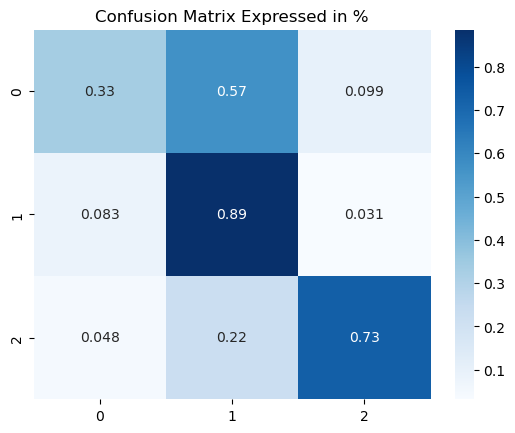

In [39]:
y_preds = grid_search_svc_count.predict(X_cv_count)
printModelStats(y_preds, y_cv)

SVM Model with best parameters for Count Vectorizations

In [53]:
# Initalising model

svc = LinearSVC(random_state= 424, C=10, penalty= 'l1', max_iter= 20000, dual = "auto", loss = "squared_hinge", fit_intercept= True, intercept_scaling= 1, class_weight= 'balanced', multi_class= "ovr")

# Train and predict
svc.fit(X_train_over_count, y_train_over_count)
y_preds = svc.predict(X_cv_count)


              precision    recall  f1-score   support

        Hate       0.21      0.33      0.26       272
   Offensive       0.91      0.89      0.90      3683
     Neither       0.81      0.73      0.77       818

    accuracy                           0.83      4773
   macro avg       0.64      0.65      0.64      4773
weighted avg       0.85      0.83      0.84      4773

The confusion matrix:
[[  91  154   27]
 [ 305 3262  116]
 [  39  182  597]]


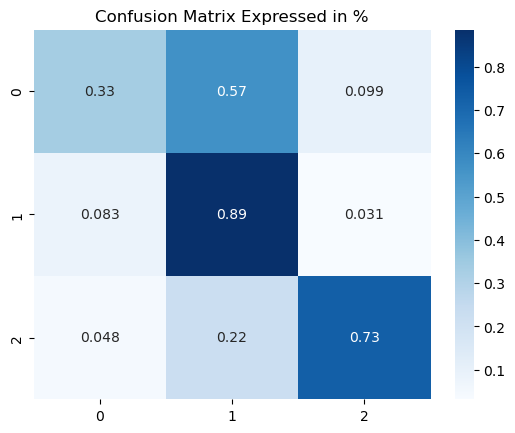

In [54]:
# output statistics
printModelStats(y_preds, y_cv)

## TFIDF

Linear SVC and data with TFIDF Vectorizations

In [42]:
# Initalising model
svc = LinearSVC(random_state = 424, max_iter = 20000)

# Train and predict
svc.fit(X_train_over_tf, y_train_over_tf)
y_preds = svc.predict(X_cv_tf)



C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

        Hate       0.30      0.47      0.37       272
   Offensive       0.94      0.89      0.91      3683
     Neither       0.79      0.83      0.81       818

    accuracy                           0.85      4773
   macro avg       0.67      0.73      0.70      4773
weighted avg       0.88      0.85      0.86      4773

The confusion matrix:
[[ 127  114   31]
 [ 261 3266  156]
 [  33  102  683]]


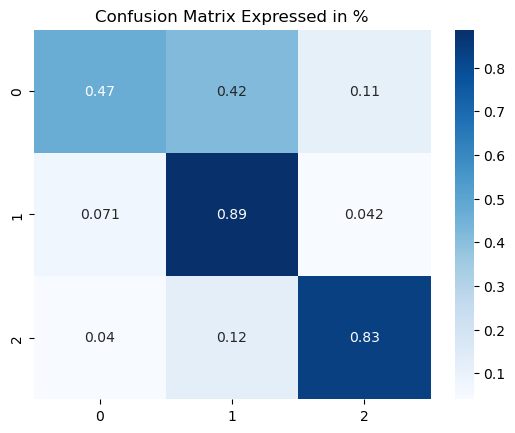

In [43]:
# output statistics
printModelStats(y_preds, y_cv)

Grid Search for SVM with TFIDF

In [44]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'dual': ["auto"],
    # 'tol': [1e-4, 1e-5],
    'C': [1, 10],
    'multi_class': ['ovr', 'crammer_singer'],
    'fit_intercept': [True, False],
    'intercept_scaling': [1, 1.5 ,2],
    'class_weight': [None, 'balanced']
}

svc = LinearSVC(random_state= 424, max_iter = 20000)

grid_search_svc_tf = GridSearchCV(svc, param_grid, verbose=3,cv = 5)
grid_search_svc_tf.fit(X_train_over_tf, y_train_over_tf)
grid_search_svc_tf.best_params_

# best params:  {'C': 10, 'dual': 'auto', 'penalty': 'l1'}

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   2.4s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.6s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.5s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.4s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l2;, score=

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   4.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   3.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.962 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   3.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   4.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   4.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   3.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.962 total time=   3.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   3.5s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=   3.8s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=   3.9s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=   3.9s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.961 total time=   3.8s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   4.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   4.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   3.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.962 total time=   3.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   3.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   4.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   4.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.962 total time=   3.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   3.5s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 1/5] 

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   4.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   5.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   4.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.962 total time=   6.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   4.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   5.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   4.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.962 total time=   6.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   4.5s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=   4.0s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=   4.0s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=   3.9s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.961 total time=   4.0s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   5.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   4.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.962 total time=   6.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   4.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   5.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   4.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.962 total time=   6.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   4.5s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.3s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 1/5] END C=1,

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   7.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   6.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   5.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.962 total time=   8.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   6.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   8.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   6.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   5.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.962 total time=   8.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   7.0s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=   4.5s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=   4.3s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=   4.4s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.961 total time=   4.2s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   7.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   6.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.962 total time=   7.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   7.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   6.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.962 total time=   7.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.8s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.2s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.2s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 1/5] END C

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=   3.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   3.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   2.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   3.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   2.7s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.950 total time=   3.3s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.949 total time=   3.6s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=   3.5s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   3.4s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, sc

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   3.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   2.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   3.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   2.7s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   3.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   2.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   3.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   2.7s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.950 total time=   3.4s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.949 total time=   3.5s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=   3.5s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   3.4s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, pen

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   3.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   2.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   3.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   2.7s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 1/5] EN

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   3.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.953 total time=   3.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   3.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=   3.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   3.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   3.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   2.8s
[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.950 total time=   3.4s
[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.949 total time=   3.5s
[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=   3.5s
[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   3.4s
[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, sc

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   2.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   2.7s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   4.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   3.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.962 total time=   4.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   4.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   4.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   3.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.962 total time=   4.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   3.2s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=   3.8s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=   3.9s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=   3.7s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.961 total time=   3.9s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ov

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   4.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   4.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   3.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.962 total time=   4.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   3.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   4.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   4.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   3.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.962 total time=   4.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   3.3s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan tota

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   4.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   4.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.962 total time=   7.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   3.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   4.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   4.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.962 total time=   7.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   4.0s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=   3.9s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=   3.9s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=   3.9s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.961 total time=   3.8s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, mu

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   4.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   4.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.962 total time=   7.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   4.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   4.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   4.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   4.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.962 total time=   7.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   4.0s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time= 

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   7.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   6.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   5.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.962 total time=  10.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   4.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   7.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   6.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   5.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.962 total time=  10.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   4.6s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=   3.9s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=   3.9s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=   3.9s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.961 total time=   3.9s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ov

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   7.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   6.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.958 total time=   5.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.962 total time=  10.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   4.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   7.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   6.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.958 total time=   5.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.962 total time=  10.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   4.6s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total tim

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   2.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   3.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   2.7s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.950 total time=   3.4s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.949 total time=   3.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=  10.3s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   3.4s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=   3.3s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l2;, score=0.946 total time=   2.6s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l2;, score=0.948 total time=   2.6s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   2.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   2.8s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=na

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=   3.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   2.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   2.7s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.950 total time=   3.4s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.949 total time=   3.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=  10.2s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   3.4s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=   3.3s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l2;, score=0.946 total time=   2.7s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l2;, score=0.948 total time=   2.7s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge,

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.953 total time=   3.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   2.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   2.7s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total 

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   3.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   2.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   2.7s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.950 total time=   3.4s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.949 total time=   3.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=  10.3s
[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   3.4s
[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=   3.3s
[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l2;, score=0.946 total time=   2.7s
[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l2;, score=0.948 total time=   2.7s
[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.953 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   2.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.948 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   3.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.953 total time=   3.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=   2.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   2.7s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 1/5] 

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.961 total time=   8.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   6.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.965 total time=   6.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=  10.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.967 total time=   5.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.961 total time=   8.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   6.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.965 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=  10.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.967 total time=   5.5s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.967 total time=  16.1s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.964 total time=  16.7s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.969 total time=  16.6s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.969 total time=  15.9s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, sc

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.961 total time=   8.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   6.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.965 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=   9.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.967 total time=   5.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.961 total time=   9.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   7.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.965 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=  10.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.967 total time=   5.6s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.961 total time=  14.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   9.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.965 total time=   9.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=  15.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.967 total time=  11.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.961 total time=  14.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   9.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.965 total time=   9.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=  15.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.967 total time=  11.7s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.967 total time=  16.3s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.965 total time=  16.7s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.969 total time=  17.0s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.970 total time=  16.9s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, pen

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.961 total time=  14.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   9.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.965 total time=   9.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=  15.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.967 total time=  11.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.961 total time=  14.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   9.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.965 total time=   9.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=  15.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.967 total time=  11.7s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 1/5] EN

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.961 total time=  22.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=  14.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.965 total time=  13.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=  23.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.967 total time=  18.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.961 total time=  22.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=  14.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.965 total time=  13.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=  23.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.967 total time=  18.7s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.967 total time=  17.0s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.965 total time=  17.3s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.969 total time=  16.1s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.970 total time=  15.7s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, sc

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.961 total time=  22.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=  14.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.965 total time=  13.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=  23.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.967 total time=  18.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.961 total time=  23.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=  15.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.965 total time=  13.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=  23.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.967 total time=  18.9s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 1/5]

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   9.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   9.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.1s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=  10.1s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=  10.3s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=   9.4s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=   9.6s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   6.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   9.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   9.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.1s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   9.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   9.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.2s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=  10.1s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=  10.3s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=   9.4s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=   9.7s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ov

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   9.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   9.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.1s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 1

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   9.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   9.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.1s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=  10.1s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=  10.3s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=   9.5s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=   9.7s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   9.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   9.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.1s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.961 total time=   8.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   6.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.965 total time=   9.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=  10.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.967 total time=   7.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.961 total time=   8.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   6.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.965 total time=  10.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=  11.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.967 total time=   7.9s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.967 total time=  16.1s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.964 total time=  16.5s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.969 total time=  16.5s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.970 total time=  15.9s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_cl

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.961 total time=   8.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   6.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.965 total time=   9.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=  11.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.967 total time=   7.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.961 total time=   8.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   6.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.965 total time=   9.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=  10.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.967 total time=   7.9s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=na

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.961 total time=  14.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   9.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.965 total time=  13.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=  15.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.967 total time=  13.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.961 total time=  14.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   9.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.965 total time=  13.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=  15.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.967 total time=  13.5s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.967 total time=  16.3s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.965 total time=  16.6s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.969 total time=  17.2s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.969 total time=  16.3s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hin

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.961 total time=  14.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=   9.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.965 total time=  13.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=  15.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.967 total time=  13.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.961 total time=  14.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=   9.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.965 total time=  13.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=  15.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.967 total time=  13.6s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total 

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.961 total time=  22.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=  14.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.965 total time=  16.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=  23.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.967 total time=  18.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.961 total time=  22.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=  14.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.965 total time=  16.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=  22.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.967 total time=  18.9s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.967 total time=  17.6s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.965 total time=  18.4s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.969 total time=  17.2s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.970 total time=  16.8s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_cl

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.961 total time=  22.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.959 total time=  14.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.965 total time=  16.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.963 total time=  22.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.967 total time=  19.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.961 total time=  22.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.959 total time=  14.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.965 total time=  16.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.963 total time=  22.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.967 total time=  18.8s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan tot

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   9.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   9.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.3s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=  10.0s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=  10.4s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=   9.6s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   9.5s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, mu

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   9.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   9.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.2s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.1s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, sc

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   9.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   5.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   6.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   9.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   5.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.2s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=  10.1s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=  10.3s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=   9.7s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   9.6s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squar

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   9.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   9.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.3s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.0s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan 

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   9.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   9.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.2s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=  10.1s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.956 total time=  10.8s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=  10.8s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=   9.5s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, mu

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.950 total time=   9.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.960 total time=   5.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=   6.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.950 total time=   9.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=   4.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.960 total time=   5.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\never\AppData\Roaming\Python\Python311\sit

{'C': 10,
 'class_weight': 'balanced',
 'dual': 'auto',
 'fit_intercept': True,
 'intercept_scaling': 2,
 'loss': 'squared_hinge',
 'multi_class': 'ovr',
 'penalty': 'l1'}

In [57]:
grid_search_svc_tf.best_params_

{'C': 10,
 'class_weight': 'balanced',
 'dual': 'auto',
 'fit_intercept': True,
 'intercept_scaling': 2,
 'loss': 'squared_hinge',
 'multi_class': 'ovr',
 'penalty': 'l1'}

              precision    recall  f1-score   support

        Hate       0.23      0.31      0.26       272
   Offensive       0.91      0.90      0.90      3683
     Neither       0.82      0.74      0.78       818

    accuracy                           0.84      4773
   macro avg       0.65      0.65      0.65      4773
weighted avg       0.85      0.84      0.85      4773

The confusion matrix:
[[  83  166   23]
 [ 242 3328  113]
 [  30  180  608]]


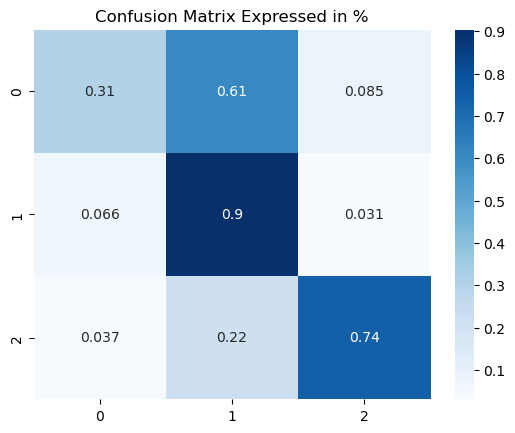

In [64]:
y_preds = grid_search_svc_tf.predict(X_cv_tf)
printModelStats(y_preds, y_cv)

Optimal model

In [58]:
# Initalising model
svc = LinearSVC(random_state=424, max_iter=20000, C=10, class_weight='balanced', dual='auto', fit_intercept=True, intercept_scaling=2, loss='squared_hinge', multi_class='ovr', penalty='l1')
# Train and predict
svc.fit(X_train_over_tf, y_train_over_tf)
y_preds = svc.predict(X_cv_tf)

              precision    recall  f1-score   support

        Hate       0.23      0.31      0.26       272
   Offensive       0.91      0.90      0.90      3683
     Neither       0.82      0.74      0.78       818

    accuracy                           0.84      4773
   macro avg       0.65      0.65      0.65      4773
weighted avg       0.85      0.84      0.85      4773

The confusion matrix:
[[  83  166   23]
 [ 242 3328  113]
 [  30  180  608]]


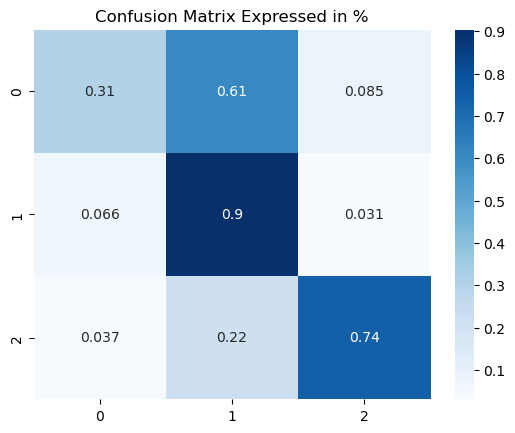

In [59]:
# output statistics
printModelStats(y_preds, y_cv)

### Conclusion

In summary, we conducted a comparison between two distinct oversampling methods:
1) Count Vectorization
2) TF-IDF

Although, we originally aimed to incorporate a comparison involving n-grams, our systems struggled to handle the immense amount of generated data, leading us to remove that aspect of the study.

After analyzing the output statistics, it seems that the optimal model is the LinearSVC model without GridSearch using Oversampling TF-IDF Vectorizations training data. It has the highest F1-Score for the 'Hate' and 'Offensive' classes, and the highest accuracy and precision for the 'Offensive' class.

It's important to note that despite running over 10 hours on the GridSearch, the model's performance on the test data remained suboptimal. This extended tuning process, while exhaustive, did not lead to improved results. This outcome might be attributred to the challenge of achieving model generalization on unseen test data. This highlights the complex dynamics of model performance in real-world applications and emphasizes the need to explore alternative method for enhancing model effectiveness.
